In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from utils.linkage import deduplicate_perfect_matches

In [2]:
orgs_df = pd.read_csv("../output/complete_organizations_table.csv",index_col=0)#,nrows=10000).sample(10)
inds_df = pd.read_csv("../output/complete_individuals_table.csv",index_col=0, low_memory=False)#, nrows=10000).sample(10)
transactions = pd.read_csv("../output/complete_transactions_table.csv",index_col=0, low_memory=False)

In [3]:
orgs_df.head(2)

,id,name,state,entity_type
0,1022,#1022 arizona committee of automotive retailers,AZ,pac
4,100112,314 action victory fund (fec id c00689828),DC,pac


In [4]:
transactions.head(2)

,transaction_id,donor_id,year,amount,recipient_id,office_sought,purpose,transaction_type,donor_type,recipient_type,donor_office
0,4640650,100592,2021,25.0,1869727,none,wr 9.13,contribution from individuals,NaN,NaN,NaN
1,8185257,201800301,2020,100.0,1779679,none,ab,contribution from individuals,NaN,NaN,NaN


In [5]:
inds_df.head(2)

,id,first_name,last_name,full_name,entity_type,state,party,company,occupation,address,zip,city
0,1869727,NaN,NaN,william stoner,individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1779679,NaN,NaN,rm coulon,individual,NaN,NaN,area agency on aging,NaN,NaN,NaN,NaN


In [6]:
inds_ids = set(inds_df.id.tolist())
orgs_ids = set(orgs_df.id.tolist())
trans_donorids = set(transactions.donor_id.tolist())
trans_recepids = set(transactions.recipient_id.tolist())
ind_id_there, org_id_there = [], []
for ind_id in inds_ids:
    if ind_id in trans_donorids:
        ind_id_there.append(ind_id)
    elif ind_id in trans_recepids:
        ind_id_there.append(ind_id)

for org_id in orgs_ids:
    if org_id in trans_donorids:
        org_id_there.append(org_id)
    elif org_id in trans_recepids:
        org_id_there.append(org_id)

len(inds_ids), len(ind_id_there), len(orgs_ids), len(org_id_there)

(541803, 541150, 77611, 77611)

In [7]:
a = []
for ind_id in inds_ids:
    if ((ind_id in trans_donorids) and (ind_id in trans_recepids)):
        a.append(ind_id)
a

['100883', '100894']

In [3]:
data = {'id':['50c7d9a1-b448-46a5-8e2d-cd15b3097360','50c7d9a1-b448-46a5-8e2d-cd15b3097360','50c7d9a1-b448-46a5-8e2d-cd15b3097360',
              '62ea1e9c-ac12-400c-b3dc-519389c0f7d3','62ea1e9c-ac12-400c-b3dc-519389c0f7d3','62ea1e9c-ac12-400c-b3dc-519389c0f7d3',
              'd31df1ca-714e-4a82-9e88-1892c0451a71','d31df1ca-714e-4a82-9e88-1892c0451a71','62ea1e9c-ac12-400c-b3dc-519389c0f7d3',
              '4db76e6e-f0d5-40eb-82de-6dbcdb562dd7','f71341d7-d27e-47eb-9b66-903af39d6cb5','c875d7de-94be-42f1-b994-dd89b114d51e',
              '910c4d36-b036-469e-aa2a-ea4ff8855a6c','60d454d1-3773-4d88-80e9-132c161da0f0','1d2b5bc0-9385-4cd7-ac48-df43b3eca6fd',
              '1d2b5bc0-9385-4cd7-ac48-df43b3eca6fd','1d2b5bc0-9385-4cd7-ac48-df43b3eca6fe','1d2b5bc0-9385-4cd7-ac48-df43b3eca6ff',
              '1d2b5bc0-9385-4cd7-ac48-df43b3eca6fd'],
        'name':['REPUBLICAN STATE LEADERSHIP COMMITTEE MICHIGAN PAC','REPUBLICAN STATE LEADERSHIP COMMITTEE MICHIGAN PAC',
                'REPUBLICAN STATE LEADERSHIP COMMITTEE MICHIGAN PAC','UNITED FOOD AND COMMERCIAL WORKERS ACTIVE BALLOT CLUB',
                'UNITED FOOD AND COMMERCIAL WORKERS ACTIVE BALLOT CLUB','UNITED FOOD AND COMMERCIAL WORKERS ACTIVE BALLOT CLUB',
                'COMMITTEE TO ELECT DR PATRICIA BERNARD','COMMITTEE TO ELECT DR PATRICIA BERNARD','UNITED FOOD AND COMMERCIAL WORKERS ACTIVE BALLOT CLUB',
                'Ugi Utilities Inc/Ugi Energy Services Llc Pac','Pabar Pac (Pa Bar Assn)','Pa Fraternal Order Of Police Pac','Citizens For Kail',
                'Paa Pac','MICHIGAN ASSOCIATION OF NURSE ANESTHETISTS PAC','MICHIGAN ASSOCIATION OF NURSE ANESTHETISTS PAC',
                'MICHIGAN ASSOCIATION OF NURSE ANESTHETISTS PAC','MICHIGAN ASSOCIATION OF NURSE ANESTHETISTS PAC','Paa Pac'],
        'state':['MI','MI','MI','MI','MI','MI','MI','MI','MI','PA','PA','PA','PA','PA','MI','MI','MI','MI','PA'],
        'entity_type':['committee','committee','committee','committee','committee','committee','committee','committee','committee',
                       'Organization','Organization','Organization','Organization','Organization','committee','committee','committee','committee','Organization']}

sample_df = pd.DataFrame(data)
sample_df['donations'] = np.random.randint(100, 6000, sample_df.shape[0])
sample_df['donations_to'] = np.random.choice(sample_df.name.tolist(), size=len(sample_df))
sample_df['received'] = np.random.randint(0, 6000, sample_df.shape[0])
sample_df['donations_from'] = np.random.choice(sample_df.name.tolist(), size=len(sample_df))
sample_df.head(5)

,id,name,state,entity_type,donations,donations_to,received,donations_from
0,50c7d9a1-b448-46a5-8e2d-cd15b3097360,REPUBLICAN STATE LEADERSHIP COMMITTEE MICHIGAN...,MI,committee,4249,REPUBLICAN STATE LEADERSHIP COMMITTEE MICHIGAN...,730,COMMITTEE TO ELECT DR PATRICIA BERNARD
1,50c7d9a1-b448-46a5-8e2d-cd15b3097360,REPUBLICAN STATE LEADERSHIP COMMITTEE MICHIGAN...,MI,committee,426,MICHIGAN ASSOCIATION OF NURSE ANESTHETISTS PAC,853,Pabar Pac (Pa Bar Assn)
2,50c7d9a1-b448-46a5-8e2d-cd15b3097360,REPUBLICAN STATE LEADERSHIP COMMITTEE MICHIGAN...,MI,committee,382,REPUBLICAN STATE LEADERSHIP COMMITTEE MICHIGAN...,620,MICHIGAN ASSOCIATION OF NURSE ANESTHETISTS PAC
3,62ea1e9c-ac12-400c-b3dc-519389c0f7d3,UNITED FOOD AND COMMERCIAL WORKERS ACTIVE BALL...,MI,committee,2328,MICHIGAN ASSOCIATION OF NURSE ANESTHETISTS PAC,4505,Paa Pac
4,62ea1e9c-ac12-400c-b3dc-519389c0f7d3,UNITED FOOD AND COMMERCIAL WORKERS ACTIVE BALL...,MI,committee,3421,Paa Pac,672,Paa Pac


### Some Considerations to Remember Moving Forward:
1. The 'get_likely_name' function takes in 3 string inputs. The data is not clean and when there are NaN entries, the function is somehow inputing null values as strings, so a column that has "Tim", "Walz" and Nan in the first, last, and full name columns, is being combined as "Tim Walz Nan". When calling this function account for this possibility

### Playing Around with Graphs

**Some considerations**
1. What attributes do we want each Node to Have?
- UUID, Name, Entity Type, Address, {from transactions table: money_donated and money_given}, affilition?
- Should transaction info also be included? If so, how would we show transaction info to multiple recipients / from multiple donors?

### Notes for Graphs
**Generating Graphs**
* nx.Graph() → the most simple undirected graph (edges going both ways)
* nx.DiGraph() → a graph with directed edges
* nx.MultiGraph() → multiple edges between nodes
* nx.MultiDiGraph() → the MultiGraph equivalent for directed graphs

**Finding Centrality**
There are 4 main ways to find the centrality of a node (how important or frequent is a node / how influential are some donors potentially)
* nx.degree_centrality : based on the assumption that important nodes have many connections
* nx.closeness_centrality : based on the assumption that important nodes are close to other nodes. It is calculated as the sum of the path lengths from the given node to all other nodes. 
* nx.eigenvector_centrality : assumes that important nodes connect other nodes. Considers the number of shortest paths between 2 nodes .For Graphs with a large number of nodes, the value of betweenness centrality is very high
* nx.betweeness_centrality : a measure of centrality in a graph based on shortest paths. For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that either the number of edges that the path passes through (for unweighted graphs) or the sum of the weights of the edges (for weighted graphs) is minimized. The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex
* nx.pagerank : Page Rank Algorithm (developed by Google founders to measure the importance of webpages) assigns a score of importance to each node. Important nodes are those with many inlinks from important pages. It mainly works for Directed Networks

**Finding Connections**
* nx.find_cliques (undirected graphs): finds the maximum subgraphs based on the number of interconnected nodes
* nx.k_core : A k-core is a maximal subgraph that contains nodes of degree k or more. Groups clusters meeting the threshold k (can be used as a toggle)

**Sources**
* https://www.youtube.com/watch?v=VetBkjcm9Go
* https://www.activestate.com/blog/graph-theory-using-python-introduction-and-implementation/ 


### Things to think about
* Apply the deduplicated_uuids.csv info to the transactions table
* After doing a left join on the inds/orgs dataset with the transactions data, the recipient_id column needs to have a recipient_name column so that a new node can be created
* for ppl who have multiple donations {and so have various attributes like office_sought, purpose, transaction_type}, should this information be saved?

In [11]:
# for now only work with datasets 
sample_inds = inds_df.loc[(inds_df['id'].isin(transactions.donor_id.tolist()))]
sample_inds


,id,first_name,last_name,full_name,entity_type,state,party,company,occupation,address,zip,city
102,100894,NaN,NaN,"abdussamad, shams",candidate,AZ,democratic,none (is a candidate),NaN,NaN,NaN,NaN
103,100894,NaN,NaN,"abdussamad, shams",candidate,AZ,democratic,none (is a candidate),NaN,NaN,NaN,NaN
104,100883,NaN,NaN,"abeytia, anna lynn",candidate,AZ,democratic,none (is a candidate),NaN,NaN,NaN,NaN
105,100883,NaN,NaN,"abeytia, anna lynn",candidate,AZ,democratic,none (is a candidate),NaN,NaN,NaN,NaN
0,b8fbed14-0766-49ab-8516-97952c654a12,FREDERICK,BERG,FREDERICK BERG ...,Individual,MI,NaN,BUTZEL LONG,ATTORNEY,1033 YORKSHIRE,48230-0000,GROSSE POINTE PARK
...,...,...,...,...,...,...,...,...,...,...,...,...
17734,75b99f42-e0d4-4c3c-89a6-16e11f6dd810,NaN,NaN,"Rodriguez, Adrian",Individual,MN,NaN,NaN,NaN,NaN,NaN,NaN
17735,8b634b74-a6be-4280-a2c4-63e46a8f9bc9,NaN,NaN,"O'Connor, Timothy J",Individual,MN,NaN,NaN,NaN,NaN,NaN,NaN
17736,d7d5b121-015f-474f-8b76-7c6c865da557,NaN,NaN,"Frenzel, Robert C",Individual,MN,NaN,NaN,NaN,NaN,NaN,NaN
17737,b2eaaec4-30d5-46f4-9922-efc8d79c16d2,NaN,NaN,"Enzminger, Peter",Individual,MN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
transactions.loc[transactions['donor_id'] == 'b8fbed14-0766-49ab-8516-97952c654a12']

,transaction_id,donor_id,year,amount,recipient_id,office_sought,purpose,transaction_type,donor_type,recipient_type,donor_office
212637,NaN,b8fbed14-0766-49ab-8516-97952c654a12,2022,100.00,1d4ae24b-2814-4d0d-995e-28fd4c26785d,NaN,NaN,DIRECT,NaN,NaN,NaN
212667,NaN,b8fbed14-0766-49ab-8516-97952c654a12,2022,50.00,1d4ae24b-2814-4d0d-995e-28fd4c26785d,NaN,NaN,DIRECT,NaN,NaN,NaN
440542,NaN,b8fbed14-0766-49ab-8516-97952c654a12,2022,50.00,1d4ae24b-2814-4d0d-995e-28fd4c26785d,NaN,NaN,DIRECT,NaN,NaN,NaN
440573,NaN,b8fbed14-0766-49ab-8516-97952c654a12,2022,50.00,1d4ae24b-2814-4d0d-995e-28fd4c26785d,NaN,NaN,DIRECT,NaN,NaN,NaN
440607,NaN,b8fbed14-0766-49ab-8516-97952c654a12,2022,50.00,1d4ae24b-2814-4d0d-995e-28fd4c26785d,NaN,NaN,DIRECT,NaN,NaN,NaN
440642,NaN,b8fbed14-0766-49ab-8516-97952c654a12,2022,50.00,1d4ae24b-2814-4d0d-995e-28fd4c26785d,NaN,NaN,DIRECT,NaN,NaN,NaN
636312,NaN,b8fbed14-0766-49ab-8516-97952c654a12,2022,50.00,1d4ae24b-2814-4d0d-995e-28fd4c26785d,NaN,NaN,DIRECT,NaN,NaN,NaN
636346,NaN,b8fbed14-0766-49ab-8516-97952c654a12,2022,50.00,1d4ae24b-2814-4d0d-995e-28fd4c26785d,NaN,NaN,DIRECT,NaN,NaN,NaN
636382,NaN,b8fbed14-0766-49ab-8516-97952c654a12,2022,50.00,1d4ae24b-2814-4d0d-995e-28fd4c26785d,NaN,NaN,DIRECT,NaN,NaN,NaN
839846,NaN,b8fbed14-0766-49ab-8516-97952c654a12,2022,83.33,f9fa8506-bfbb-4ef0-9e08-5c9c3e948121,NaN,NaN,DIRECT/FUND RAISER,NaN,NaN,NaN


In [28]:
x = orgs_df.loc[orgs_df['id']=='1d4ae24b-2814-4d0d-995e-28fd4c26785d']
x.iloc[0]['name']

'BUTZEL LONG POLITICAL ACTION COMMITTEE'

In [3]:
# apply dedup to both inds and orgs
inds_df = deduplicate_perfect_matches(inds_df)
orgs_df = deduplicate_perfect_matches(orgs_df)

# map the uuids in transaction donor and recipient columns to the deduplicated uuids
deduped = pd.read_csv("../output/deduplicated_UUIDs.csv")
transactions[['donor_id','recipient_id']] = transactions[['donor_id','recipient_id']].replace(deduped)


In [4]:
# add recipient name to transactions df: 
def name_identifier(uuid:str, orgs_df, inds_df) -> str:
    # 1st check orgs df:
    name_in_org = orgs_df.loc[orgs_df['id']==uuid] 
    if len(name_in_org)> 0:
        return name_in_org.iloc[0]['name']
    # theoretically it must be in inds if not in orgs, but for the sample data
    # this might not be the case
    name_in_ind = inds_df.loc[inds_df['id']==uuid]
    if len(name_in_ind)> 0:
        return name_in_ind.iloc[0]['full_name']
    else: return None

In [5]:
ex = transactions.sample(10)
ex['recipient_name'] = ex['recipient_id'].apply(name_identifier, args=(orgs_df, inds_df))
ex

,transaction_id,donor_id,year,amount,recipient_id,office_sought,purpose,transaction_type,donor_type,recipient_type,donor_office,recipient_name
884875,NaN,6c2b94a2-4247-4bc4-b784-6b5a9a2ae9f2,2022,5.00,533f6de5-5140-4799-be24-1d5f4e228d1b,NaN,NaN,DIRECT,NaN,NaN,NaN,FRIENDS OF DANA NESSEL
122735,NaN,b906d3eb-3874-4789-b523-e2eaab415328,2022,9.16,f2fad7aa-a782-4d56-8343-049d2150c16f,NaN,MERCHANT SVCS FEES,NaN,NaN,NaN,NaN,THE JULIE BRIXIE BLUE WAVE FUND 2
458788,NaN,88740001-952f-477e-b2da-9b24f747f6ce,2022,1.00,a0619eff-155f-442f-ab71-b5c0ee942223,NaN,NaN,DIRECT,NaN,NaN,NaN,COMERICA INC POLITICAL ACTION COMMITTEE
1522918,NaN,da538e73-c823-48f8-b4ec-920aa1da458f,2022,20.00,81169dce-331e-44ad-b870-1b376d49cf2f,NaN,NaN,DIRECT,NaN,NaN,NaN,WASTE MANAGEMENT EMPLOYEES BETTER GOVERNMENT F...
1933218,NaN,33814139-8442-4050-b15a-40aed1aa9db7,2022,35.00,abdf0530-e2fb-40b6-9a52-dea386cd60f4,NaN,NaN,DIRECT,NaN,NaN,NaN,GRETCHEN WHITMER FOR GOVERNOR
465682,NaN,133431dd-41ef-4161-97ef-02d23fc05b42,2022,7.50,d582fba6-2a0c-4864-9fb2-5a4f898f26c2,NaN,NaN,DIRECT,NaN,NaN,NaN,MI ASSOC OF COMMUNITY BANKERS OF MICHIGAN POLI...
761674,NaN,668d8471-ade6-469b-9e6b-71ddbfd1d8ba,2022,25.00,1d05ca29-e97f-43cd-bd9e-f313573b324b,NaN,NaN,DIRECT,NaN,NaN,NaN,END CITIZENS UNITED NON-FEDERAL MI
993543,NaN,b9b66f08-4e99-43e7-9161-c75db92b0bb4,2022,10.00,ecebf482-f298-4777-bea6-e3451c75e3fc,NaN,NaN,DIRECT,NaN,NaN,NaN,RESCARE INC DBA BRIGHTSPRING HEALTH SERVICES L...
1196687,NaN,f4942707-0d7f-4617-b478-56af7504123e,2022,12.00,a24e305e-a49b-4cb3-a857-d629f1162ce8,NaN,NaN,DIRECT,NaN,NaN,NaN,MARATHON PETROLEUM CORPORATION EMPLOYEES PAC
334698,NaN,96be56db-56b6-48d0-9cf7-9d47da307388,2022,11.80,9fc94e93-b6aa-400d-9a4a-d6501afb84dc,NaN,NaN,DIRECT,NaN,NaN,NaN,MICHIGAN REGIONAL COUNCIL OF CARPENTERS POLITI...


In [63]:

# this step took more than 16 minutes to run...think of alternative way
# id_to_name = {id: name for id, name in zip(inds_sample.id.tolist(), inds_sample.full_name.tolist())} #the same would be applied to orgs
transactions['recipient_name'] = transactions['recipient_id'].apply(lambda x: sample_inds.loc[sample_inds.id == x] )

# left merge according to ind_id and transaction donor_id. This was entities that only received money will still be there, no info from ind_dataset
# is lost
merged_inds_sample = pd.merge(sample_inds,transactions,how='left',left_on='id',right_on='donor_id')
merged_inds_sample.head(2)

,id,company,entity_type,first_name,full_name,last_name,party,state,transaction_id,donor_id,year,amount,recipient_id,office_sought,purpose,transaction_type,donor_type,recipient_type,donor_office
0,2562573,0,individual,NaN,various 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1617483,aggregate cash,individual,NaN,cash _small donations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
sample_inds.loc[sample_inds.full_name == 'abdussamad, shams']

,id,company,entity_type,first_name,full_name,last_name,party,state
27,100894,none (is a candidate),candidate,NaN,"abdussamad, shams",NaN,democratic,AZ


In [87]:
def add_notes_from_df(df):
    G = nx.MultiDiGraph()
    #inds or org...
    if 'name' in df.columns:
        node_name = 'name'
    else: node_name = 'full_name'

    for _, row in df.iterrows():
        G.add_node(row[node_name])
        for column in df.columns:
            # only add info that's present
            if (row[column] != 'nan'):
                nx.set_node_attributes(G, row[column], name=column)
                #nx.set
    nx.draw_random(G, with_labels=True)
    plt.show()
    return G

In [77]:
merged_inds_sample.loc[merged_inds_sample.donor_id.notnull()]

,id,company,entity_type,first_name,full_name,last_name,party,state,transaction_id,donor_id,year,amount,recipient_id,office_sought,purpose,transaction_type,donor_type,recipient_type,donor_office
27,100894,none (is a candidate),candidate,NaN,"abdussamad, shams",NaN,democratic,AZ,5088079,100894,2022.0,5.00,750413,state representative - district 11,e-qual online qc,ccec $5 qualifying contribution,NaN,NaN,NaN
28,100894,none (is a candidate),candidate,NaN,"abdussamad, shams",NaN,democratic,AZ,5088080,100894,2022.0,5.00,2002235,state representative - district 11,NaN,ccec $5 qualifying contribution,NaN,NaN,NaN
29,100894,none (is a candidate),candidate,NaN,"abdussamad, shams",NaN,democratic,AZ,5088081,100894,2022.0,100.00,1942680,state representative - district 11,NaN,receive loan from candidate or family member,NaN,NaN,NaN
30,100894,none (is a candidate),candidate,NaN,"abdussamad, shams",NaN,democratic,AZ,5088083,100894,2022.0,5.00,-1,state representative - district 11,NaN,in-state contributions $100 or less,NaN,NaN,NaN
31,100894,none (is a candidate),candidate,NaN,"abdussamad, shams",NaN,democratic,AZ,5088084,100894,2022.0,20.00,-1,state representative - district 11,NaN,in-state contributions $100 or less,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,100883,none (is a candidate),candidate,NaN,"abeytia, anna lynn",NaN,democratic,AZ,5084100,100883,2022.0,10.00,2017053,state representative - district 11,NaN,contribution from individuals,NaN,NaN,NaN
598,100883,none (is a candidate),candidate,NaN,"abeytia, anna lynn",NaN,democratic,AZ,5084102,100883,2022.0,180.00,2017970,state representative - district 11,video production,in-kind cont. from individual,NaN,NaN,NaN
599,100883,none (is a candidate),candidate,NaN,"abeytia, anna lynn",NaN,democratic,AZ,5084103,100883,2022.0,51.99,2008747,state representative - district 11,NaN,contribution from individuals,NaN,NaN,NaN
600,100883,none (is a candidate),candidate,NaN,"abeytia, anna lynn",NaN,democratic,AZ,5084105,100883,2022.0,10.80,1193076,state representative - district 11,NaN,contribution from individuals,NaN,NaN,NaN


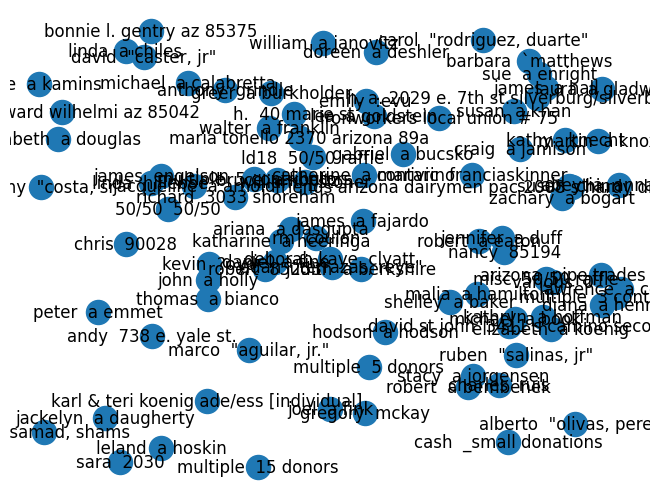

{'id': '1869727',
 'company': nan,
 'entity_type': 'individual',
 'first_name': nan,
 'full_name': 'william  \x08stoner',
 'last_name': nan,
 'party': nan,
 'state': nan,
 'transaction_id': nan,
 'donor_id': nan,
 'year': nan,
 'amount': nan,
 'recipient_id': nan,
 'office_sought': nan,
 'purpose': nan,
 'transaction_type': nan,
 'donor_type': nan,
 'recipient_type': nan,
 'donor_office': nan}

In [91]:
x = add_notes_from_df(merged_inds_sample)
x.nodes['abdussamad, shams']

In [79]:
merged_inds_sample.loc[merged_inds_sample.full_name == 'william  \x08stoner']

,id,company,entity_type,first_name,full_name,last_name,party,state,transaction_id,donor_id,year,amount,recipient_id,office_sought,purpose,transaction_type,donor_type,recipient_type,donor_office
663,1869727,NaN,individual,NaN,william stoner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
G = nx.Graph()
G.add_node(0)
nx.set_node_attributes(G, "red", name="color")
nx.set_node_attributes(G, 2, name="size")
G.add_node(1)
nx.set_node_attributes(G, np.nan, name='color')
G.nodes[0]

{'color': nan, 'size': 2}

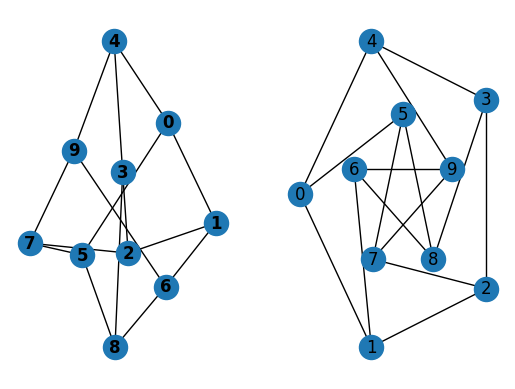

In [5]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='light')


{'REPUBLICAN STATE LEADERSHIP COMMITTEE MICHIGAN PAC': Text(-0.071782758799796, -0.3387166453182715, 'REPUBLICAN STATE LEADERSHIP COMMITTEE MICHIGAN PAC'),
 'Paa Pac': Text(0.06023249378587841, -0.07946204618171311, 'Paa Pac'),
 'UNITED FOOD AND COMMERCIAL WORKERS ACTIVE BALLOT CLUB': Text(-0.12554712442237967, 0.08789304420689323, 'UNITED FOOD AND COMMERCIAL WORKERS ACTIVE BALLOT CLUB'),
 'COMMITTEE TO ELECT DR PATRICIA BERNARD': Text(-0.40486733116122986, -0.04769565353200762, 'COMMITTEE TO ELECT DR PATRICIA BERNARD'),
 'Pabar Pac (Pa Bar Assn)': Text(-0.6714326170558735, 0.21693950702464565, 'Pabar Pac (Pa Bar Assn)'),
 'Ugi Utilities Inc/Ugi Energy Services Llc Pac': Text(1.0, -0.38838038123915186, 'Ugi Utilities Inc/Ugi Energy Services Llc Pac'),
 'Pa Fraternal Order Of Police Pac': Text(0.5897482153166077, -0.2569656851069028, 'Pa Fraternal Order Of Police Pac'),
 'MICHIGAN ASSOCIATION OF NURSE ANESTHETISTS PAC': Text(-0.27784326029554446, 0.2828712220763738, 'MICHIGAN ASSOCIATIO

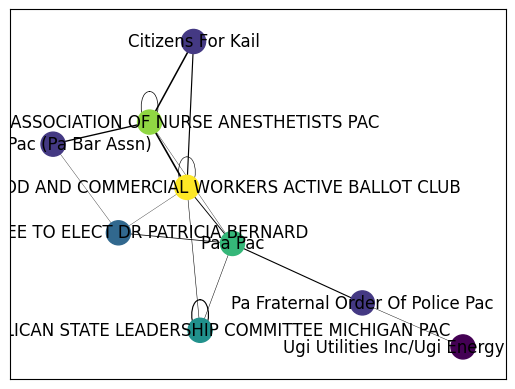

In [11]:
G = nx.from_pandas_edgelist(sample_df,source='name',target='donations_to',edge_attr=['donations','received'])
G.nodes()
pos=nx.spring_layout(G)
weights = list(nx.get_edge_attributes(G,'donations').values())
weights = [i/5000 for i in weights]
node_color = [G.degree(v) for v in G] 
#node_size = [0.0005 * nx.get_node_attributes(G, 'donations')[v] for v in G] 
nx.draw_networkx_nodes(G, pos, node_color=node_color)#, node_size=node_size) 
nx.draw_networkx_edges(G, pos, width=weights)
nx.draw_networkx_labels(G, pos)

In [12]:
G.nodes['Citizens For Kail']

{}

In [8]:

# fixing the size of the figure 
plt.figure(figsize =(10, 7)) 

node_color = [G.degree(v) for v in G] 
# node colour is a list of degrees of nodes 

node_size = [0.0005 * nx.get_node_attributes(G, 'population')[v] for v in G] 
# size of node is a list of population of cities 

edge_width = [0.0015 * G[u][v]['weight'] for u, v in G.edges()] 
# width of edge is a list of weight of edges 

nx.draw_networkx(G, node_size = node_size, 
				node_color = node_color, alpha = 0.7, 
				with_labels = True, width = edge_width, 
				edge_color ='.4', cmap = plt.cm.Blues) 

plt.axis('off') 
plt.tight_layout(); 

KeyError: 'REPUBLICAN STATE LEADERSHIP COMMITTEE MICHIGAN PAC'

<Figure size 1000x700 with 0 Axes>

In [26]:
G = nx.MultiDiGraph()
G.add_node(0)
nx.set_node_attributes(G, "red", name="color")
nx.set_node_attributes(G, 4, name = 'size')
G.add_node(2)
nx.set_node_attributes(G, "white", name='color')
G.nodes[2]

{'color': 'white'}

In [28]:
G.add_node(2)
nx.set_node_attributes(G, 4, name='age')
G.nodes[2]

{'color': 'white', 'age': 4}